<a href="https://colab.research.google.com/github/2303A51553/Natural-language-process/blob/main/B09_2303A51553_nlp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/tweets.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


target
0    9256
1    2114
Name: count, dtype: int64


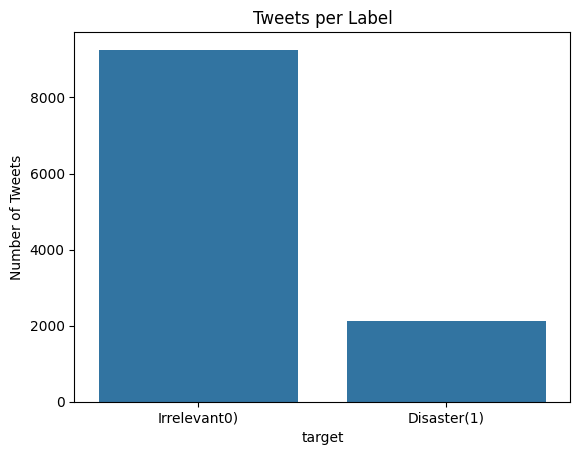

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
label_counts=df['target'].value_counts()
print(label_counts)
sns.barplot(x=label_counts.index,y=label_counts.values)
plt.xticks([0,1],['Irrelevant0)','Disaster(1)'])
plt.ylabel('Number of Tweets')
plt.title('Tweets per Label')
plt.show()

In [6]:
# Show 5 sample tweets from each class
print("Sample Disaster Tweets:")
display(df[df['target']==1]['text'].head(5))
print("\nSample Irrelevant Tweets:")
display(df[df['target']==0]['text'].head(5))

Sample Disaster Tweets:


,text
0,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,Telangana: Section 144 has been imposed in Bha...
2,Arsonist sets cars ablaze at dealership https:...
3,Arsonist sets cars ablaze at dealership https:...
6,Several houses have been set ablaze in Ngemsib...



Sample Irrelevant Tweets:


,text
4,"""Lord Jesus, your love brings freedom and pard..."
5,"If this child was Chinese, this tweet would ha..."
8,"National Security Minister, Kan Dapaah's side ..."
9,This creature who’s soul is no longer clarent ...
11,Social media went bananas after Chuba Hubbard ...


In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens=word_tokenize(text)#tokenization
    stop_words=set(stopwords.words('english'))#stop words
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)
df["cleaned_text"]=df["text"].astype(str).apply(preprocess_text)
print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  \
0      Communal violence in Bhainsa, Telangana. "Ston...       1   
1      Telangana: Section 144 has been imposed in Bha...       1   
2      Arsonist sets cars ablaze at dealership https:...       1   
3      Arsonist sets cars ablaze at dealership https:...       1   
4      "Lord Jesus, your love brings freedom and pard...   

In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from string import punctuation
nltk.download('wordnet')
st = PorterStemmer()
wnl = WordNetLemmatizer()
sample_tweets = df['text'].head(5)
results=[]
for text in sample_tweets:
    tokens = word_tokenize(text.lower())
    tokens_no_punct = [t for t in tokens if t not in punctuation]
    stemmed = [st.stem(t) for t in tokens_no_punct]
    lemmatized = [wnl.lemmatize(t) for t in tokens_no_punct]
    results.append({
        'Original Text': text,
        'Stemmed Text': ' '.join(stemmed),
        'Lemmatized Text': ' '.join(lemmatized)
    })
results_df = pd.DataFrame(results)
print("Comparison of Stemming and Lemmatization on Sample Tweets:")
display(results_df)
print("\nCommentary on the differences:")
print("Stemming is a process that cuts off the ends of words to get to the root form, which may not be a real word (eg: 'changing' becomes 'chang').")
print("Lemmatization is a process that uses vocabulary to return the base form of word, which is a real word (eg: 'changing' becomes 'change'). ")

[nltk_data] Downloading package wordnet to /root/nltk_data...


Comparison of Stemming and Lemmatization on Sample Tweets:


,Original Text,Stemmed Text,Lemmatized Text
0,"Communal violence in Bhainsa, Telangana. ""Ston...",commun violenc in bhainsa telangana `` stone w...,communal violence in bhainsa telangana `` ston...
1,Telangana: Section 144 has been imposed in Bha...,telangana section 144 ha been impos in bhainsa...,telangana section 144 ha been imposed in bhain...
2,Arsonist sets cars ablaze at dealership https:...,arsonist set car ablaz at dealership http //t....,arsonist set car ablaze at dealership http //t...
3,Arsonist sets cars ablaze at dealership https:...,arsonist set car ablaz at dealership http //t....,arsonist set car ablaze at dealership http //t...
4,"""Lord Jesus, your love brings freedom and pard...",`` lord jesu your love bring freedom and pardo...,`` lord jesus your love brings freedom and par...



Commentary on the differences:
Stemming is a process that cuts off the ends of words to get to the root form, which may not be a real word (eg: 'changing' becomes 'chang').
Lemmatization is a process that uses vocabulary to return the base form of word, which is a real word (eg: 'changing' becomes 'change'). 


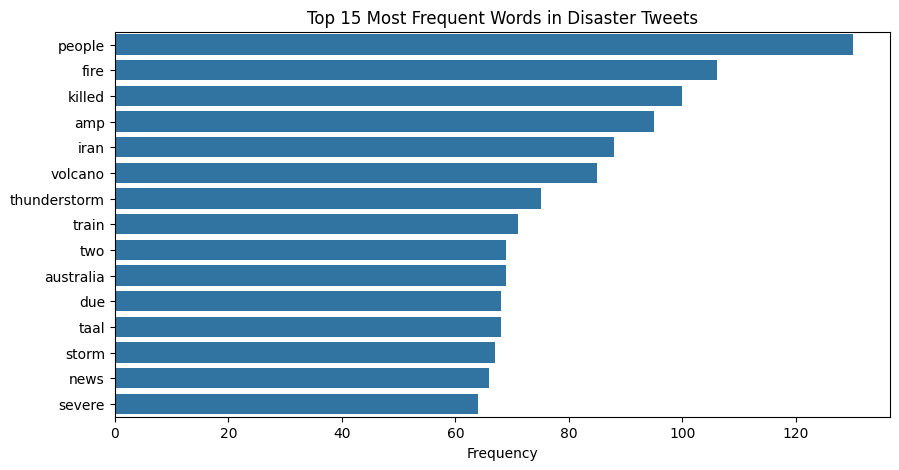

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
disaster_tokens=[token for text in df[df['target'] == 1]['cleaned_text'] for token in text.split()]
freq_dist=Counter(disaster_tokens)
most_common=freq_dist.most_common(15)
words, counts=zip(*most_common)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 15 Most Frequent Words in Disaster Tweets')
plt.xlabel('Frequency')
plt.show()

In [10]:
avg_len_before=df['text'].apply(lambda x: len(word_tokenize(x))).mean()
avg_len_after=df['cleaned_text'].apply(lambda x: len(x.split())).mean()
print(f"Average tweet length before preprocessing: {avg_len_before:.2f} tokens")
print(f"Average tweet length after preprocessing: {avg_len_after:.2f} tokens")

Average tweet length before preprocessing: 20.78 tokens
Average tweet length after preprocessing: 10.40 tokens


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['clean_text']=df['cleaned_text'].apply(lambda x: ' '.join(x.split()))
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(df['clean_text'])
y=df['target']
print("Shape of TF-IDF matrix:", X.shape)
print("Shape of target variable:", y.shape)

Shape of TF-IDF matrix: (11370, 5000)
Shape of target variable: (11370,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train model
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
#Performance metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1-Score:",f1_score(y_test, y_pred))

Accuracy: 0.8865435356200527
Precision: 0.896551724137931
Recall: 0.3939393939393939
F1-Score: 0.5473684210526316


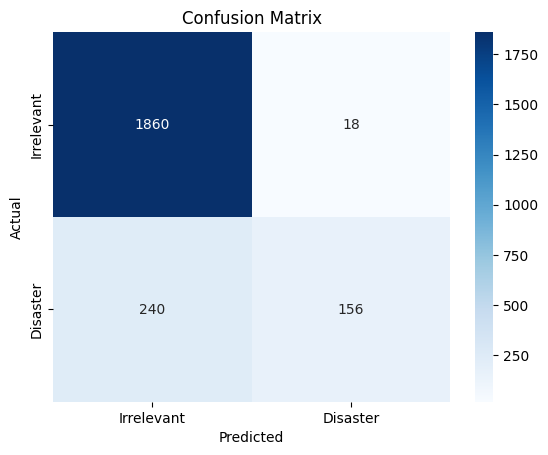

In [13]:
#Confusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['Irrelevant','Disaster'],yticklabels=['Irrelevant','Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()